# 0. Load imports 

In [2]:
## imports
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

## print multiple things from same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## load data on 2020 crimes in DC
df = dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")

# 1. Questions: list comprehension

- In class example, why did we need the "courses" at the beginning of the list iteration
- How did the join syntax work in the example where we paste together offenses from same ward

In [4]:
## toy example

### pool of courses
all_courses = ["QSS20", "QSS17", "GOV10", "GOV4", "CSC1"]


## 1.1 Application 1: filtering to a smaller list

When we might use: have a lot of columns in a dataframe; want to filter to a smaller set using some pattern

In [6]:
### pull out ones that contain GOV in the string
gov_c = [course for course in all_courses if "GOV" in course]
gov_c # result

['GOV10', 'GOV4']

In [8]:
### showing that the "course" is just a placeholder/
### arbitrary interator
gov_c_alt = [x for x in all_courses if "GOV" in x]

gov_c == gov_c_alt

True

In [10]:
"QSS20"[:3]

'QSS'

## 1.2 Application two: keep all objects in the list but do some transformation

In [12]:
all_courses

## strip the numbers from the course names
courses_prefix = [x[:3] for x in all_courses]
courses_prefix # could then find unique elements


['QSS20', 'QSS17', 'GOV10', 'GOV4', 'CSC1']

['QSS', 'QSS', 'GOV', 'GOV', 'CSC']

In [14]:
# Join all together example
" #:(# ".join(courses_prefix)

'QSS #:(# QSS #:(# GOV #:(# GOV #:(# CSC'

#### Your turn: Using original list, add "dartmouth_" prefix to the course name

In [16]:
def manipulate_string(s):
    return s[:3] #to just get 0, 1, 2 indices in the string

[manipulate_string(x)for x in all_courses]


['QSS', 'QSS', 'GOV', 'GOV', 'CSC']

In [50]:
dartmouth_prefix = ["dartmouth_" + x for x in all_courses]
dartmouth_prefix

#could also do this by having prefix = "dartmoutgh_" then using prefix + x to make it more general

['dartmouth_QSS20',
 'dartmouth_QSS17',
 'dartmouth_GOV10',
 'dartmouth_GOV4',
 'dartmouth_CSC1']

## 1.3 Subsetting columns

Use list comprehension to filter to columns with id in the string. Then, create a new dataframe called df1 that contains only column heads with "id"

In [54]:
id_cols = [col for col in df.columns if "ID" in col]
id_cols

## Then, filter the data
df1 = df[id_cols]

['BID', 'OBJECTID', 'OCTO_RECORD_ID']

In [56]:
df1

,BID,OBJECTID,OCTO_RECORD_ID
0,NaN,673713315,NaN
1,NaN,673713316,NaN
2,NaN,673713317,NaN
3,NaN,673713318,NaN
4,NaN,673713319,NaN
...,...,...,...
27926,NaN,674255559,NaN
27927,CAPITOL HILL,674255577,NaN
27928,NaN,674255586,NaN
27929,NaN,674255588,NaN


## 1.4 Comprehension for numbers

Here we compare two ways of creating a list of even numbers.

In [58]:
num_list = np.arange(10000)
num_list

## numpy is very fast bc "functions are built close to the cpu" 
## like it takes very little time to generate these numbers

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [28]:
%%time
even_nums = [i for i in num_list if (i % 2) == 0]
even_nums
#remember that % extracts the remainder

CPU times: user 1.63 ms, sys: 9 μs, total: 1.64 ms
Wall time: 1.64 ms


[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 102,
 104,
 106,
 108,
 110,
 112,
 114,
 116,
 118,
 120,
 122,
 124,
 126,
 128,
 130,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 154,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 172,
 174,
 176,
 178,
 180,
 182,
 184,
 186,
 188,
 190,
 192,
 194,
 196,
 198,
 200,
 202,
 204,
 206,
 208,
 210,
 212,
 214,
 216,
 218,
 220,
 222,
 224,
 226,
 228,
 230,
 232,
 234,
 236,
 238,
 240,
 242,
 244,
 246,
 248,
 250,
 252,
 254,
 256,
 258,
 260,
 262,
 264,
 266,
 268,
 270,
 272,
 274,
 276,
 278,
 280,
 282,
 284,
 286,
 288,
 290,
 292,
 294,
 296,
 298,
 300,
 302,
 304,
 306,
 308,
 310,
 312,
 314,
 316,
 318,
 320,
 322,
 324,
 326,
 328,
 330,
 332,
 334,
 336,
 338,
 340,
 342,
 344,
 346,
 348,
 350,

In [60]:
%%time
num_list[~(num_list % 2).astype(bool)] #can use it as a filter for True and False

CPU times: user 612 μs, sys: 771 μs, total: 1.38 ms
Wall time: 1.16 ms


array([   0,    2,    4, ..., 9994, 9996, 9998])

In [34]:
num_list[ ~(num_list % 2).astype(bool) ]

array([   0,    2,    4, ..., 9994, 9996, 9998])

#### Your turn: Extract all numbers in num_list that end in 7

In [72]:
end_seven = [x for x in num_list if x % 10 == 7]

## alternative way of turning last one into a string
end_seven_alt = [x for x in num_list if str(x)[-1] == "7"]

## the string one is slower (bc converting things back and forth type takes longer)

#[n for n in num_list if (n-7) % 10 == 0] --> like hi this is creative


In [150]:
## prof trying to do fasrt way

num_list[~(num_list % 7).astype(bool)]
##this is a list of divisble by 7-->it flags the true or false to filter out of num_list and give you the array of what you want

## for ending in 7
num_list[(num_list % 10 == 7).astype(bool)]

## THIS TYPE OF CODE (using pure numpy) IS SO MUCH FASTER

array([   0,    7,   14, ..., 9982, 9989, 9996])

array([   7,   17,   27,   37,   47,   57,   67,   77,   87,   97,  107,
        117,  127,  137,  147,  157,  167,  177,  187,  197,  207,  217,
        227,  237,  247,  257,  267,  277,  287,  297,  307,  317,  327,
        337,  347,  357,  367,  377,  387,  397,  407,  417,  427,  437,
        447,  457,  467,  477,  487,  497,  507,  517,  527,  537,  547,
        557,  567,  577,  587,  597,  607,  617,  627,  637,  647,  657,
        667,  677,  687,  697,  707,  717,  727,  737,  747,  757,  767,
        777,  787,  797,  807,  817,  827,  837,  847,  857,  867,  877,
        887,  897,  907,  917,  927,  937,  947,  957,  967,  977,  987,
        997, 1007, 1017, 1027, 1037, 1047, 1057, 1067, 1077, 1087, 1097,
       1107, 1117, 1127, 1137, 1147, 1157, 1167, 1177, 1187, 1197, 1207,
       1217, 1227, 1237, 1247, 1257, 1267, 1277, 1287, 1297, 1307, 1317,
       1327, 1337, 1347, 1357, 1367, 1377, 1387, 1397, 1407, 1417, 1427,
       1437, 1447, 1457, 1467, 1477, 1487, 1497, 15

#### Your turn: Divide each number  in num_list by 2

In [152]:
div_by_two = [x/2 for x in num_list]

#alternative...
num_list_div2 = [num for num in num_list/2] #this is faster bc its like having num_list/2
#this one creates the list first then kind of for loops over it

#you cane't do any of this using range, this is done with numpy arrays
#like you can't just divide a whole list by 2, but you can divide an entire numpy array by 2

num_list / 2

array([0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 4.9985e+03, 4.9990e+03,
       4.9995e+03])

# 2. Questions: lambda functions

Two questions:

- General syntax (see here for a reference: https://www.w3schools.com/python/python_lambda.asp 
- How they work in the context of aggregations

How is a lambda function different from a "normal" user-defined function (that has the syntax def func_name(arg): etc?

- Operates similarly to normal user-defined functions in that it can take any # of arguments
- Operates differently in that it's an "anonymous" function or a function that we don't explicitly name/save in memory

## 2.1 General syntax for lambda functions

In [80]:
### two pools of courses
socsci = ["QSS20", "QSS17", "GOV10"]
natsci = ["BIO2", "PHYS3"]


## generalize some of the steps
## above into a two-arg function
## that takes the course prefix
## and a list of all courses
def filter_courses(prefix, all_courses):
    rel_courses = [c for c in all_courses if prefix in c]
    return(rel_courses)

### a few applications 
filter_courses(prefix = "QSS", all_courses = socsci)
filter_courses(prefix = "QSS", all_courses = natsci)
filter_courses(prefix = "BIO", all_courses = natsci)

['QSS20', 'QSS17']

[]

['BIO2']

In [82]:
## what's the lambda function version of this
filter_courses_v2 = lambda prefix, all_courses: [c for c in all_courses if prefix in c]
filter_courses_v2(prefix = "BIO", all_courses = natsci)


['BIO2']

## 2.2 using alongside agg

In [84]:
## use lambda to find modal block in a ward- multiple ways

### way 1: subsetting agg syntex
df.groupby("WARD")["BLOCK"].agg(lambda x: x.mode())

### way 2: dictionary agg syntax
df.groupby("WARD").agg({"BLOCK": lambda x: x.mode()})


WARD
1                  3100 - 3299 BLOCK OF 14TH STREET NW
2    [1100 - 1199 BLOCK OF NEW YORK AVENUE NW, 1300...
3             5300 - 5399 BLOCK OF WISCONSIN AVENUE NW
4                100  - 199 BLOCK OF CARROLL STREET NW
5            900 - 999 BLOCK OF RHODE ISLAND AVENUE NE
6                       600 - 699 BLOCK OF H STREET NE
7                934 - 1099 BLOCK OF EASTERN AVENUE NE
8               2300 - 2399 BLOCK OF GOOD HOPE ROAD SE
Name: BLOCK, dtype: object

,BLOCK
WARD,
1,3100 - 3299 BLOCK OF 14TH STREET NW
2,"[1100 - 1199 BLOCK OF NEW YORK AVENUE NW, 1300..."
3,5300 - 5399 BLOCK OF WISCONSIN AVENUE NW
4,100 - 199 BLOCK OF CARROLL STREET NW
5,900 - 999 BLOCK OF RHODE ISLAND AVENUE NE
6,600 - 699 BLOCK OF H STREET NE
7,934 - 1099 BLOCK OF EASTERN AVENUE NE
8,2300 - 2399 BLOCK OF GOOD HOPE ROAD SE


#### Your turn: Group by WARD and get the mean and standard deviation (std) of X and Y

In [164]:
#this is easier to flattten out, and also can combine the two tables
df1 = df.groupby("WARD").agg({"X": [lambda x: x.mean(), lambda x: x.std()]})
df1.columns = ["mean_x", "std_x"]

df2 = df.groupby("WARD").agg({"Y": [lambda x: x.mean(), lambda x: x.std()]})
df2.columns = ["mean_y", "std_y"]

df1
df2

#FAST WAY BUT...this is ahrder to flatten out bc under X there is mean and std instead of having distinc tcolumsbn for them
Alt = df.groupby("WARD").agg({"X": ["mean", "std"], "Y": ["mean", "std"]})
Alt

,mean_x,std_x
WARD,,
1,-77.031256,0.007200
2,-77.038959,0.014106
3,-77.075320,0.013408
4,-77.024905,0.011813
5,-76.989451,0.014957
6,-77.001175,0.011302
7,-76.947402,0.018753
8,-76.988986,0.012791


,mean_y,std_y
WARD,,
1,38.924716,0.006417
2,38.905941,0.005360
3,38.941557,0.013887
4,38.957674,0.013923
5,38.920249,0.012766
6,38.893112,0.010021
7,38.888669,0.012504
8,38.850526,0.015775


X                    Y          
           mean       std       mean       std
WARD                                          
1    -77.031256  0.007200  38.924716  0.006417
2    -77.038959  0.014106  38.905941  0.005360
3    -77.075320  0.013408  38.941557  0.013887
4    -77.024905  0.011813  38.957674  0.013923
5    -76.989451  0.014957  38.920249  0.012766
6    -77.001175  0.011302  38.893112  0.010021
7    -76.947402  0.018753  38.888669  0.012504
8    -76.988986  0.012791  38.850526  0.015775

### Random sampling and distance measures

In [114]:
random_uniform = np.random.rand(5)  # 5 random numbers between 0 and 1
print("Random numbers from uniform distribution:", random_uniform)

random_normal = np.random.randn(5)  # 5 random numbers from a standard normal distribution
print("Random numbers from normal distribution:", random_normal)

Random numbers from uniform distribution: [0.78775951 0.41970278 0.71761187 0.99936747 0.36934452]
Random numbers from normal distribution: [-0.99611464 -0.95888456  0.00811361  1.50418692  0.42674956]


In [36]:
np.random.rand(5)
#output is array of these (array is homogeonous whereras elements in a list can be heterogenous)

array([0.47475369, 0.06625674, 0.04076197, 0.98222797, 0.18331128])

<Axes: ylabel='Density'>

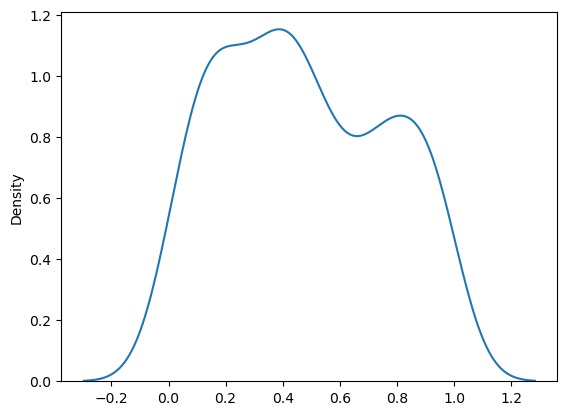

In [46]:
N = 200 #as you increase this, it gets flatter

sns.kdeplot(np.random.rand(N))

<Axes: ylabel='Density'>

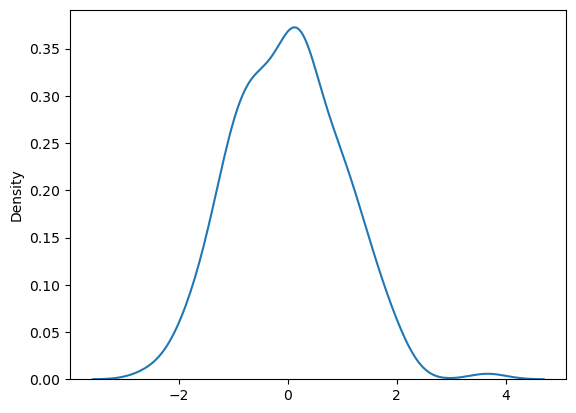

In [116]:
sns.kdeplot(np.random.randn(N))

Your turn: This last portion will consist of computing distances between points.
1. Create a dataframe with four columns (name them X1, Y1, X2, Y2), using np.random.randn(). Each should have a different mean.
2. Create a new column called Manhattan and Euclidean, and compute the distance using apply.
3. Plot the distribution of the two. What do you notice?

In [134]:
df_rand = pd.DataFrame(np.random.randn(100, 4), columns = ["X1", "Y1", "X2", "Y2"])

df_rand.mean() #this computes the mean of all columns at once, we see that each column has a different mean as per the instructions

X1   -0.160928
Y1    0.008167
X2    0.105115
Y2   -0.006593
dtype: float64

In [166]:
#df_rand["Manhattan"] = 

df_rand["Euclidean"] = df_rand[["X1", "Y1", "X2", "Y2"]].apply(np.linalg.norm, axis = 1)

df_rand

,X1,Y1,X2,Y2,Euclidean
0,0.500022,1.971163,0.872033,-1.761143,2.827998
1,-1.158189,-2.851038,-0.433787,0.691508,3.183736
2,0.998077,0.098848,0.596908,0.201421,1.184397
3,-0.178665,-2.000303,0.077141,-1.311490,2.399810
4,0.920901,0.540210,-0.895878,0.628258,1.528788
...,...,...,...,...,...
95,0.948220,0.460038,-1.420121,2.141749,2.777515
96,-1.044561,0.968784,-0.682985,-0.906049,1.821275
97,-0.355965,-2.212934,1.262731,-0.332001,2.593936
98,-1.219767,0.893040,-0.497742,0.278876,1.615819


,X1,Y1,X2,Y2
0,0.659372,5.577982,10.814325,16.147734
1,-0.284884,5.905347,11.420173,14.947168
2,-0.453596,4.377561,9.451486,15.323475
3,1.198022,6.217252,8.120858,16.489721
4,1.994564,3.885757,8.999872,14.342978
...,...,...,...,...
995,0.419499,6.332848,7.915570,15.758261
996,-0.438466,5.380262,9.082237,13.811611
997,-0.549952,3.874006,10.426624,15.797050
998,-0.016637,3.466664,9.637678,14.276663


(array([ 1.,  1.,  0.,  1.,  3.,  9., 15., 12., 24., 29., 36., 65., 62.,
        78., 81., 97., 89., 85., 69., 69., 53., 38., 30., 21., 14., 10.,
         2.,  2.,  3.,  1.]),
 array([12.57712341, 13.03892378, 13.50072415, 13.96252452, 14.42432488,
        14.88612525, 15.34792562, 15.80972599, 16.27152636, 16.73332672,
        17.19512709, 17.65692746, 18.11872783, 18.5805282 , 19.04232856,
        19.50412893, 19.9659293 , 20.42772967, 20.88953004, 21.35133041,
        21.81313077, 22.27493114, 22.73673151, 23.19853188, 23.66033225,
        24.12213261, 24.58393298, 25.04573335, 25.50753372, 25.96933409,
        26.43113445]),
 <BarContainer object of 30 artists>)

(array([ 1.,  0.,  1.,  1.,  2.,  9., 12., 15., 17., 31., 30., 66., 54.,
        77., 87., 94., 92., 85., 70., 74., 53., 42., 34., 19., 15., 11.,
         2.,  1.,  4.,  1.]),
 array([ 8.92699114,  9.25245141,  9.57791168,  9.90337194, 10.22883221,
        10.55429248, 10.87975274, 11.20521301, 11.53067328, 11.85613354,
        12.18159381, 12.50705408, 12.83251435, 13.15797461, 13.48343488,
        13.80889515, 14.13435541, 14.45981568, 14.78527595, 15.11073621,
        15.43619648, 15.76165675, 16.08711702, 16.41257728, 16.73803755,
        17.06349782, 17.38895808, 17.71441835, 18.03987862, 18.36533888,
        18.69079915]),
 <BarContainer object of 30 artists>)

Text(0.5, 1.0, 'Distance Distribution')

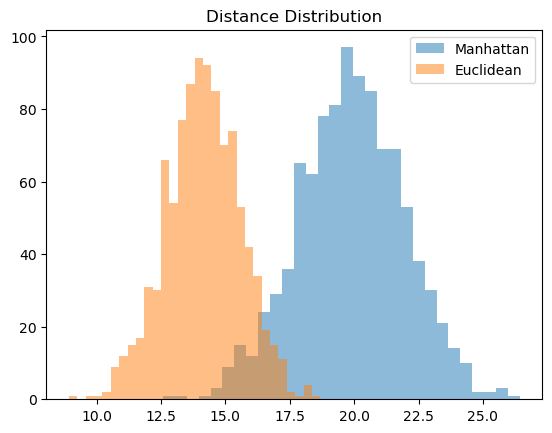

In [176]:
## ANSWER FROM CLASS

N=1000 #all you have to change is this to alter the graph
X1 = np.random.randn(N) + 0
Y1 = np.random.randn(N) + 5
X2 = np.random.randn(N) + 10
Y2 = np.random.randn(N) + 15

data = ({'X1': X1, 'Y1': Y1, 'X2': X2, 'Y2': Y2})
df1 = pd.DataFrame(data)
df1

#write in the lambda functions to get these
df1["Manhattan"] = df1.apply(lambda row: np.abs(row["X1"] - row["X2"]) + np.abs(row["Y1"] - row["Y2"]), axis=1) #using axis since doing it on the whole df, not just one specified column)
df1["Euclidean"] = df1.apply(lambda row: np.sqrt((row["X1"] - row["X2"])**2 + (row["Y1"] - row["Y2"])**2), axis=1)

plt.hist(df1["Manhattan"],bins=30,alpha=0.5, label="Manhattan")
plt.hist(df1["Euclidean"],bins=30,alpha=0.5, label="Euclidean")
plt.legend()
plt.title("Distance Distribution")
plt.show()

In [188]:
df1.X.apply(lambda x: x +5) #without .X. it won't work, so if you don't have colun name you have to specify the axis

df1.apply(lambda x: x + 5, axis = 1) #use r if operating on row to make things clearer fdor yourself


## but the more complicated thigns get, teh more you use numpy
# np.abs(df1.X1..... etc. to apply these distances over a lambda thing

AttributeError: 'DataFrame' object has no attribute 'X'